In [8]:
# Root-Mean-Square Amplitude Normalization
import math
import pandas as pd
import librosa
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
import numpy as np

from pydub import AudioSegment
import sounddevice as sd
import time

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Táto časť obsahuje príkazy na import potrebných knižníc, ako sú math, pandas, librosa, matplotlib, seaborn a numpy. Nastavuje tiež tému vykresľovania na "bielu" a inicializuje palety farieb pre vykresľovanie pomocou seaborn a matplotlib.

In [2]:
x, Fs = librosa.load("../git/sounds/AcGtr.wav") # cesta na .wav file 
N = len(x)

Táto časť načíta zvukový súbor (vo formáte .wav) umiestnený na zadanej ceste k súboru pomocou knižnice librosa. Taktiež vypočíta dĺžku načítaného signálu x a uloží ju do N.

In [3]:
# Zvolime konstantu rohdB <=0 a vypocitame roh
rhodB = -5
rho = 10**(rhodB/20)

Tu sa zvolí konštanta rhodB s hodnotou -5 dB a potom sa prevedie na lineárnu stupnicu (rho) pomocou vzorca 10**(rhodB/20). Táto hodnota lineárnej stupnice sa použije na normalizáciu.

In [4]:
# Root-Mean-Square Normalization
xRMS = math.sqrt(sum(np.power(x,2))/N)
yRMSNorm = (rho/xRMS) * x

V tejto časti sa pomocou funkcií np.power() a math.sqrt() vypočíta stredná kvadratická hodnota (RMS) načítaného signálu x. Hodnota RMS sa uloží do xRMS. Potom sa signál x normalizuje pomocou vypočítaných hodnôt rho a xRMS a normalizovaný signál sa uloží do yRMSNorm.

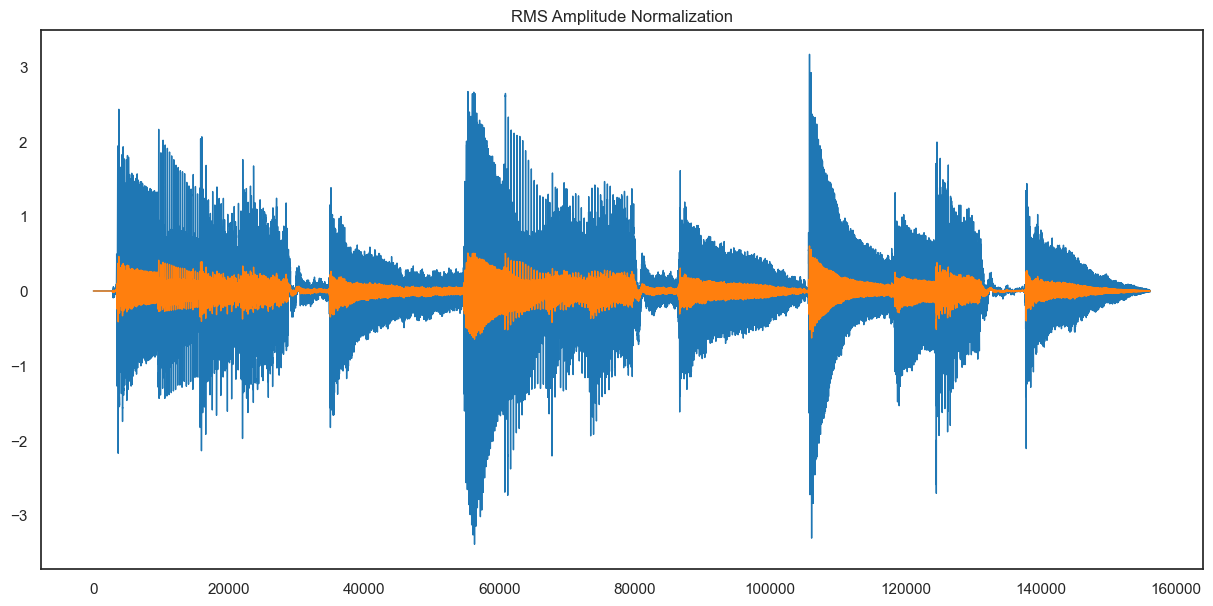

In [5]:
pd.Series(yRMSNorm).plot(figsize=(15,7),
                  lw=1,
                  title='RMS Amplitude Normalization',
                  color=color_pal[0])
pd.Series(x).plot(figsize=(15,7),
                  lw=1,
                  title='',
                  color=color_pal[1])
plt.show()

V grafe sú zobrazené dve čiary: modrá čiara predstavuje normalizovaný zvukový signál po použití normalizácie amplitúdy koreňovej strednej hodnoty a oranžová čiara predstavuje normálny, nenormalizovaný zvukový signál. Môžete vidieť, že normalizovaný zvukový signál má rovnomernejšiu amplitúdu a nemá výrazné špičky, ktoré by mohli signál skresliť.

In [7]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/AcGtr.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(x, Fs)
time.sleep(seconds_duration + 1)
sd.play(yRMSNorm, Fs)